In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})

import sys
sys.path.append("../../scripts")
import importlib

import model
importlib.reload(model)
from model import Model, model_from_file

import model_plot
importlib.reload(model_plot)
from model_plot import model_plot

import norms
importlib.reload(norms)
from norms import *

%matplotlib inline

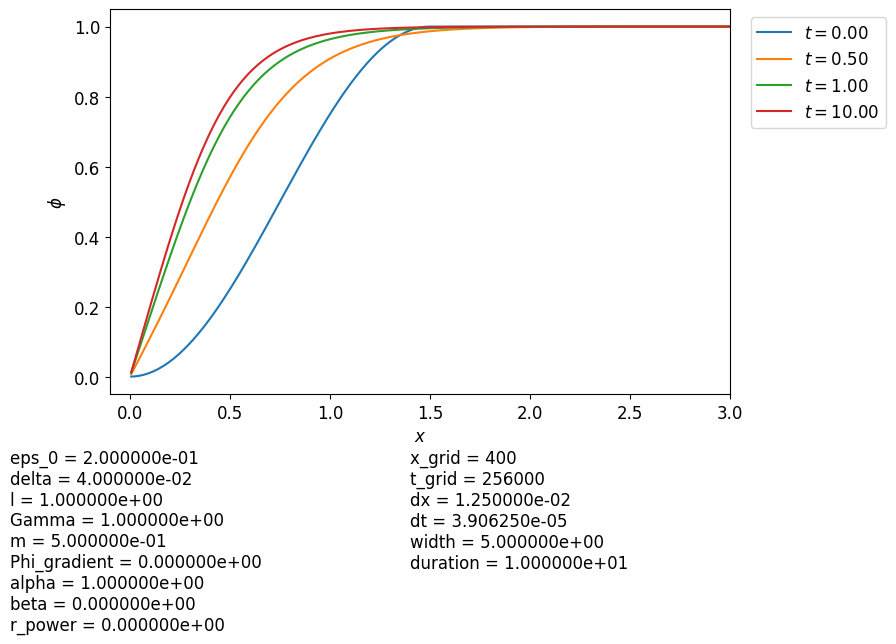

In [21]:
model_400 = model_from_file('../../bin/model_400.csv')
model_plot(model_400, [0, 0.5, 1, 10], figsize=(8, 5), xlim=[-0.1, 3])

In [15]:
def norm_plot(model, grid):
    plt.figure(figsize=(10, 3))
    plt.title('Непрерывная норма градиента ({})'.format(grid))
    plt.xlabel('время')
    plt.yscale('log')
    plt.plot(model.ts, model.df_additional.iloc[:, -1])
    plt.show()

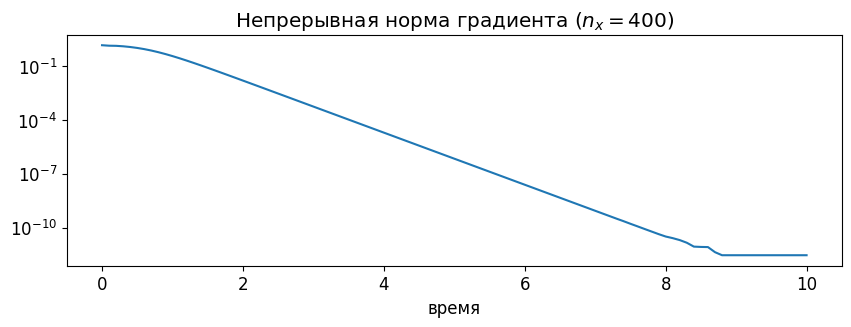

In [16]:
norm_plot(model_400, '$n_x = 400$')

In [17]:
def plot_near_0(model, times):
    plt.figure(figsize=(8, 5))
    plt.title('Приближение средними по ячейкам вблизи 0')
    plt.xlabel('$x$')
    plt.ylabel('$\phi$')
    plt.xlim([-0.005, 0.105])
    plt.ylim([-0.01, 0.15])
    t_indices = [model.t_index(t) for t in times]
    for i in t_indices:
        plt.plot(model.xs, model.phi[i], '-o')
    plt.legend(['$t = {:.2f}$'.format(i * model.params['dt_data']) for i in t_indices],
               bbox_to_anchor=(1.02, 1), loc="upper left")
    for i in range(10):
        x = i * model.params['dx']
        plt.plot([x, x], [0, 1], '--', color='black')

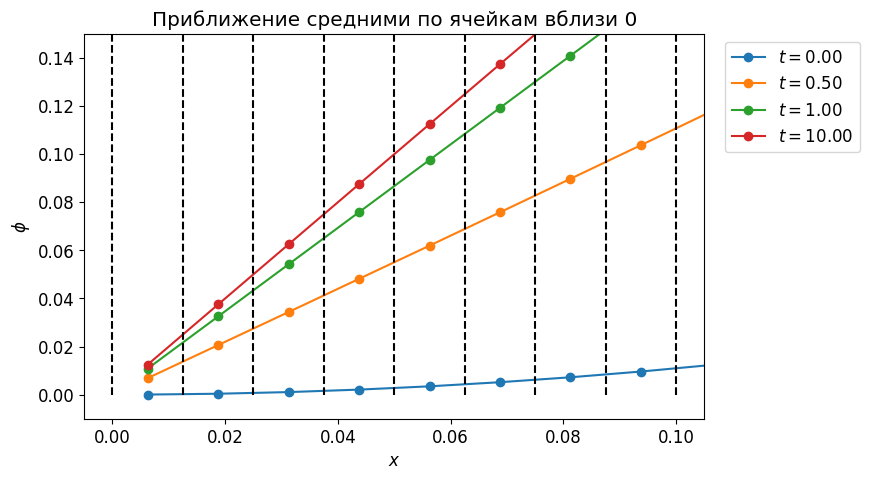

In [18]:
plot_near_0(model_400, [0, 0.5, 1, 10])